# Machine Learning Model Building Pipeline: Data Analysis

1. Data Preperation
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

# 0. Generic

**Importing Libraries**

In [43]:
# to handle datasets
import pandas as pd
import numpy as np
# for plotting
import matplotlib.pyplot as plt
#% matplotlib inline
import seaborn as sns
#for subpressing warnings
import warnings
from IPython.display import display
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [44]:
#to install chardet library
#!conda install --yes chardet

In [45]:
#checking encoding of data
import chardet

rawdata = open('candy-data.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)
print(result) # It's utf-8 with 99% confidence.

utf-8
{'language': '', 'confidence': 0.99, 'encoding': 'utf-8'}


In [46]:
# load dataset
data = pd.read_csv("candy-data.csv")

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(85, 13)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## 1.Data Preperation

In [47]:
#get all the missing values
data.isnull().sum()# No missing values

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

We have a total of 12 variables that describe a chocolate. 9 of them are categorical and the rest 3 are numerical variables.
1. chocolate: Does it contain chocolate?
2. fruity: Is it fruit flavored?
3. caramel: Is there caramel in the candy?
4. peanutalmondy: Does it contain peanuts, peanut butter or almonds?
5. nougat: Does it contain nougat?
6. crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
7. hard: Is it a hard candy?
8. bar: Is it a candy bar?
9. pluribus: Is it one of many candies in a bag or box?
10. sugarpercent: The percentile of sugar it falls under within the data set.
11. pricepercent: The unit price percentile compared to the rest of the set.
12. winpercent: The overall win percentage according to 269,000 matchups.

In [48]:
data['winpercent'] = data['winpercent']/100

**Deriving new features**

In [49]:
data['sugarbyprice'] = data['sugarpercent'].div(data['pricepercent']) # higher value means the candy is sweet as well as cheap.
data['winbyprice'] = data['winpercent'].div(data['pricepercent']) # higher value means the candy is more liked as well as cheap.
categorival_vars = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar',
                    'pluribus']
numerical_vars = ['sugarpercent', 'pricepercent', 'winpercent', 'sugarbyprice', 'winbyprice']
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,0.669717,0.851163,0.778741
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,0.676029,1.181996,1.322954
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,0.322611,0.094828,2.781128
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,0.461165,0.021526,0.902476
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,0.523415,1.772994,1.024295


In [50]:
data.sort_values(by=['winpercent', 'sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,0.841803,1.105991,1.293092
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,0.818663,0.121864,2.934274
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,0.816429,0.602649,0.901136
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,0.767686,0.612524,1.502321
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,0.766738,0.838710,1.177785
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,0.734350,0.623656,1.128034
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,0.730996,0.927803,1.122881
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,0.728879,1.517665,1.119630
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,0.714651,1.267281,1.097773
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,0.707356,0.787484,0.922238


Reese's seem to be a favourite. Note that all the top competitors are chocolaty as well. Also, Reese's Miniatures is very cheap when compared to top competitors and overall as well.

In [51]:
data.sort_values(by=['winbyprice', 'winpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,0.457367,15.818181,41.578862
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.093,0.023,0.377223,4.043478,16.401016
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,0.430889,3.735294,12.673212
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,0.394606,21.529410,11.606045
69,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.569,0.058,0.345790,9.810345,5.961895
22,HersheyÕs Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,0.553755,1.365591,5.954350
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,0.598640,0.594828,5.160689
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,0.528259,0.594828,4.553961
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,0.297037,10.608696,4.304883
59,Sixlets,1,0,0,0,0,0,0,0,1,0.220,0.081,0.347220,2.716049,4.286667


Tootsie Roll Midgies seems to perform better when price and win percentages are taken.

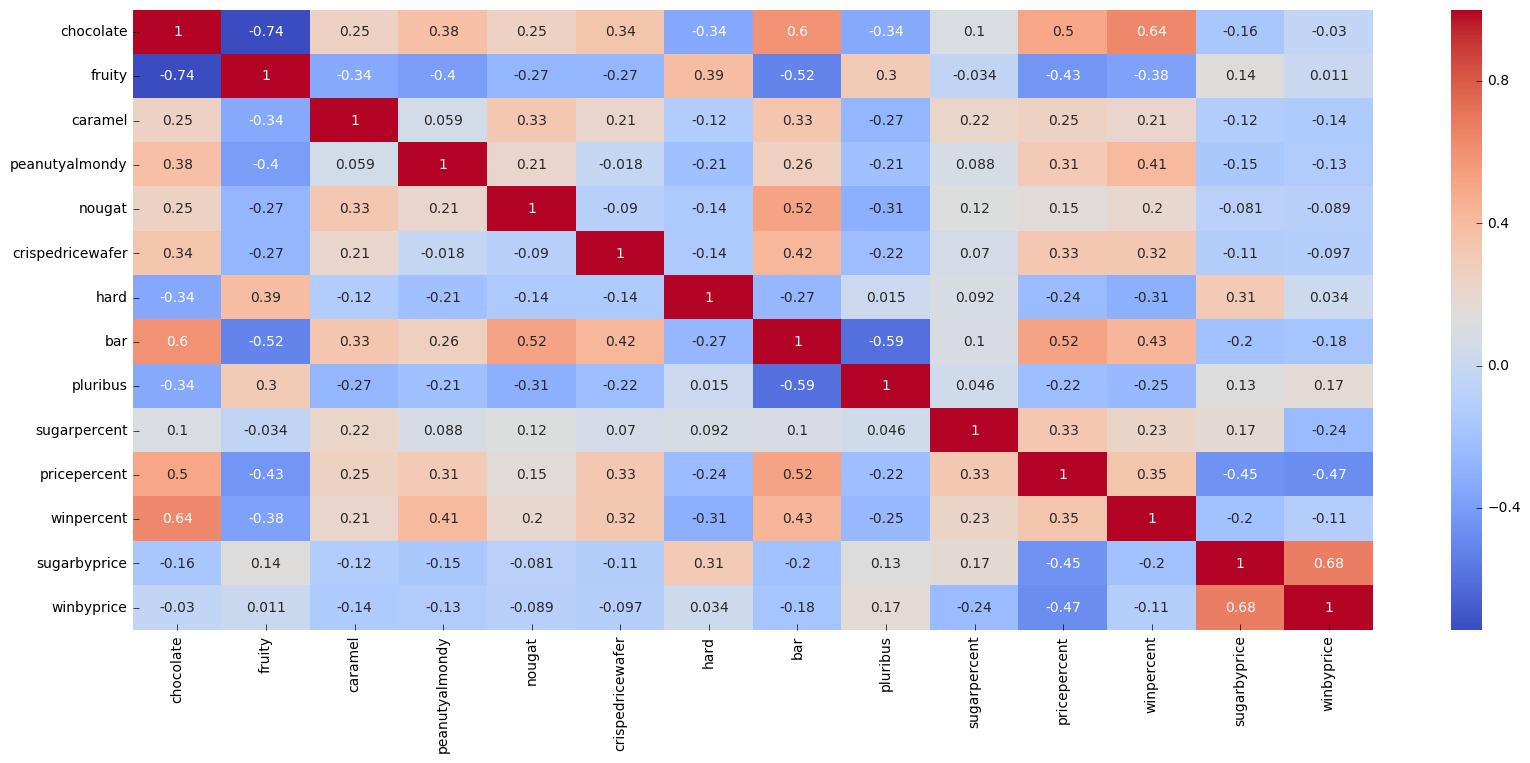

In [52]:
plt.figure(figsize = (20,8))        
sns.heatmap(data.corr(),annot=True, cmap = 'coolwarm')
plt.show()

In [53]:
#segregating Dependent and Independent variables
X = data.iloc[:, 1:12].values
y = data.iloc[:, 12].values

**Principal Component Analysis**

In [62]:
# Splitting the dataset into the Training set and Test set
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [55]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)